In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import altair as alt
import plotnine as p9
import time
from tqdm.notebook import tqdm, trange
import tqdm
from pprint import pprint 
import statsmodels.api as sm
import math
from scipy.optimize import minimize
import geopandas as gpd

In [3]:
lead = pd.read_csv("sequential_cleaned+geo_cleaned.csv")
lead

,Date Sampled,Address,1st Draw,2nd Draw,3rd Draw,4th Draw,5th Draw,6th Draw,7th Draw,8th Draw,...,boundingbox,lat,lon,display_name,class,type,importance,road,neighbourhood,suburb
0,9/4/2019,100XX S Bell Ave,1.52,1.37,1.59,2.53,2.44,1.90,2.45,2.92,...,"['41.8298961', '41.8303315', '-87.6813753', '-...",41.830258,-87.681374,"South Bell Avenue, Ducktown, McKinley Park, Ch...",highway,residential,0.62001,South Bell Avenue,Ducktown,McKinley Park
1,7/16/2016,100XX S Calhoun Ave,3.70,2.62,8.83,13.80,13.20,13.60,12.30,11.80,...,"['41.7027818', '41.7081424', '-87.5620899', '-...",41.704591,-87.562038,"South Calhoun Avenue, Trumbull Park Terrace, S...",highway,residential,0.62000,South Calhoun Avenue,Trumbull Park Terrace,South Deering
2,12/17/2019,100XX S Calumet Ave,4.02,5.35,6.97,6.55,17.70,16.60,12.10,11.60,...,"['41.7801361', '41.7803908', '-87.6172609', '-...",41.780298,-87.617220,"South Calumet Avenue, Greater Grand Crossing, ...",highway,residential,0.62001,South Calumet Avenue,Greater Grand Crossing,Washington Park
3,7/14/2021,100XX S Carpenter St,14.00,11.00,8.83,8.12,8.69,7.14,11.00,7.51,...,"['41.8694719', '41.8726581', '-87.6533123', '-...",41.871438,-87.653266,"South Carpenter Street, University Village/Lit...",highway,residential,0.62000,South Carpenter Street,University Village/Little Italy,Near West Side
4,12/14/2019,100XX S Carpenter St,9.54,7.31,6.95,5.63,4.91,7.15,12.40,13.10,...,"['41.8694719', '41.8726581', '-87.6533123', '-...",41.871438,-87.653266,"South Carpenter Street, University Village/Lit...",highway,residential,0.62000,South Carpenter Street,University Village/Little Italy,Near West Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,1/26/2022,9XX W Gunnison St,6.20,7.00,7.20,8.90,9.80,9.70,9.40,9.40,...,"['41.9702296', '41.9702507', '-87.6610757', '-...",41.970239,-87.660464,"West Gunnison Street, Asia on Argyle, Uptown, ...",highway,residential,0.62000,West Gunnison Street,Asia on Argyle,Uptown
1804,1/19/2019,XX S Oakley,2.01,2.38,3.07,3.74,3.94,4.15,4.08,4.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1805,11/22/2021,XX W 78Th St,11.00,11.40,8.06,8.49,21.40,28.60,29.30,19.70,...,"['41.7515562', '41.7516078', '-87.7073245', '-...",41.751585,-87.705499,"West 78th Street, Ashburn, Chicago, Lake Towns...",highway,residential,0.62000,West 78th Street,NaN,Ashburn
1806,10/28/2021,XX W 81St St,4.41,5.43,4.96,3.87,4.80,4.93,9.11,8.83,...,"['41.7452691', '41.7453035', '-87.734934', '-8...",41.745295,-87.733959,"West 81st Street, Ashburn, Chicago, Lake Towns...",highway,residential,0.62000,West 81st Street,NaN,Ashburn


In [4]:
#What data is actually in the table?
lead.columns

Index(['Date Sampled', 'Address', '1st Draw', '2nd Draw', '3rd Draw',
       '4th Draw', '5th Draw', '6th Draw', '7th Draw', '8th Draw', '9th Draw',
       '10th Draw', '11th Draw', '3 Minute', '5 Minute', '7 Minute',
       '10 Minute', '15 Minute', '20 Minute', 'geodata', 'place_id',
       'osm_type', 'osm_id', 'boundingbox', 'lat', 'lon', 'display_name',
       'class', 'type', 'importance', 'road', 'neighbourhood', 'suburb'],
      dtype='object')

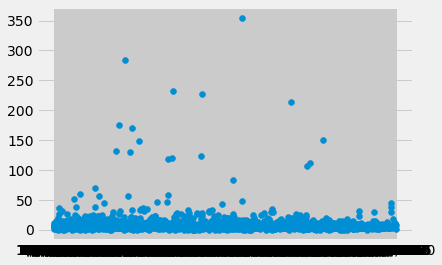

In [6]:
#Let's compare date sampled and amount of lead drawn
plt.scatter(lead["Date Sampled"],lead["1st Draw"])

In [9]:
#Seems like there are some weird outliers, maybe there were some input mistakes
lead["1st Draw"].describe()

count    1808.000000
mean        9.056284
std        18.280624
min         0.000000
25%         3.737500
50%         5.820000
75%         9.082500
max       355.000000
Name: 1st Draw, dtype: float64

In [11]:
#let's see how mnany are 1 STD above the mean.
len(lead.iloc[np.where(lead["1st Draw"]>28)])
#This is a fair amount

54

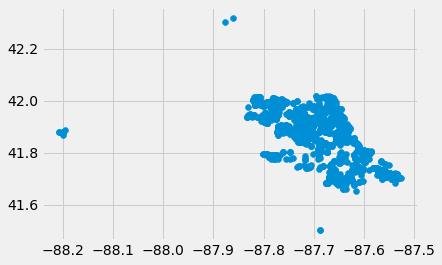

In [37]:
plt.scatter(lead.lon,lead.lat)
#What are those weird point super far away

In [38]:
#Let's look at those that are way far west
lead.iloc[np.where(lead.lon < -88.1)]
#These are all in West Chicago (a completely different city in a different county)

,Date Sampled,Address,1st Draw,2nd Draw,3rd Draw,4th Draw,5th Draw,6th Draw,7th Draw,8th Draw,...,boundingbox,lat,lon,display_name,class,type,importance,road,neighbourhood,suburb
150,11/27/2018,11XX W George,4.50,8.74,11.90,13.40,13.60,13.90,12.70,10.90,...,"['41.8796919', '41.8806948', '-88.2086387', '-...",41.880193,-88.208327,"West Chicago High School, George Street, West ...",leisure,pitch,0.4101,George Street,NaN,NaN
457,2/28/2022,24XX W Augusta Ave,284.00,463.00,283.00,228.00,129.00,83.20,93.30,78.80,...,"['41.865988', '41.866811', '-88.204613', '-88....",41.865990,-88.199723,"Augusta Avenue, West Chicago, DuPage County, I...",highway,residential,0.6100,Augusta Avenue,NaN,NaN
1014,2/14/2019,51XX W Wilson,4.04,4.32,4.91,5.33,4.87,4.82,5.98,12.50,...,"['41.8803378', '41.8808595', '-88.2004024', '-...",41.880578,-88.200105,"West Chicago Police Department, Wilson Avenue,...",amenity,police,0.4101,Wilson Avenue,NaN,NaN
1058,4/20/2019,52XX W George,4.87,9.54,10.80,10.80,10.20,9.57,10.20,9.71,...,"['41.8796919', '41.8806948', '-88.2086387', '-...",41.880193,-88.208327,"West Chicago High School, George Street, West ...",leisure,pitch,0.4101,George Street,NaN,NaN
1126,7/31/2019,54XX W Wilson,3.51,4.46,5.40,6.38,6.40,6.46,6.80,8.54,...,"['41.8803378', '41.8808595', '-88.2004024', '-...",41.880578,-88.200105,"West Chicago Police Department, Wilson Avenue,...",amenity,police,0.4101,Wilson Avenue,NaN,NaN
1127,10/25/2019,54XX W Wilson,7.70,8.88,9.37,10.50,11.90,12.90,13.30,15.30,...,"['41.8803378', '41.8808595', '-88.2004024', '-...",41.880578,-88.200105,"West Chicago Police Department, Wilson Avenue,...",amenity,police,0.4101,Wilson Avenue,NaN,NaN
1459,6/21/2021,6XX N Pine St,15.00,18.00,21.00,18.00,19.00,18.00,15.00,14.00,...,"['41.888242', '41.8883037', '-88.197723', '-88...",41.888276,-88.196193,"Pine Street, West Chicago, DuPage County, Illi...",highway,residential,0.6100,Pine Street,NaN,NaN


In [40]:
#lets check out the northernmost ones
lead.iloc[np.where(lead.lat > 42.2)]
#Also North Chicago

,Date Sampled,Address,1st Draw,2nd Draw,3rd Draw,4th Draw,5th Draw,6th Draw,7th Draw,8th Draw,...,boundingbox,lat,lon,display_name,class,type,importance,road,neighbourhood,suburb
576,10/10/2018,29XX S Bonaparte Ave,19.80,14.90,13.70,9.66,8.59,8.27,7.04,8.70,...,"['42.302373', '42.302438', '-87.878116', '-87....",42.302379,-87.876315,"Bonaparte Avenue, North Chicago, Lake County, ...",highway,residential,0.61,Bonaparte Avenue,NaN,NaN
718,7/27/2021,36XX S Wallace Ave,1.03,1.13,1.78,2.04,2.12,2.02,2.18,2.49,...,"['42.315801', '42.324982', '-87.86103', '-87.8...",42.319433,-87.861003,"Wallace Avenue, North Chicago, Lake County, Il...",highway,residential,0.61,Wallace Avenue,NaN,NaN


In [43]:
#How about the southernmost ones?
lead.iloc[np.where(lead.lat <41.6)]
#This is for Lake Forest

,Date Sampled,Address,1st Draw,2nd Draw,3rd Draw,4th Draw,5th Draw,6th Draw,7th Draw,8th Draw,...,boundingbox,lat,lon,display_name,class,type,importance,road,neighbourhood,suburb
18,2/11/2019,102XX S Forest,3.04,4.00,4.06,5.77,9.88,9.24,9.08,7.15,...,"['41.5022225', '41.5031068', '-87.6984535', '-...",41.503104,-87.686749,"Illinois Street, Park Forest, Rich Township, C...",highway,residential,0.41,Illinois Street,NaN,NaN
1751,12/19/2018,95XX S Forest,3.79,3.41,2.25,2.29,2.33,2.28,1.70,1.03,...,"['41.5022225', '41.5031068', '-87.6984535', '-...",41.503104,-87.686749,"Illinois Street, Park Forest, Rich Township, C...",highway,residential,0.41,Illinois Street,NaN,NaN


In [ ]:
#Why these three suburbs and not others around them?
#Let's ask the policy group...